In [241]:
import nltk
import numpy as np
from matplotlib import pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [242]:
stopwords=stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [243]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens

In [244]:
def tokens_to_vector(tokens,word_index_map):
    x = np.zeros(len(word_index_map)) # last element is for the label
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    return x

In [257]:
def LSA_fun(path,VD=10,model='SVD'):
    
    titles = [line.rstrip() for line in open(path)]
   
	
	# create a word-to-index map so that we can create our word-frequency vectors later
    # let's also save the tokenized versions so we don't have to tokenize again later
    word_index_map = {}
    current_index = 0
    all_tokens = []
    all_titles = []
    index_word_map = []
    error_count = 0
	
	
	
    for title in titles:
        try:
            title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
            all_titles.append(title)
            tokens = my_tokenizer(title)
            all_tokens.append(tokens)
            for token in tokens:
                if token not in word_index_map:
                    word_index_map[token] = current_index
                    current_index += 1
                    index_word_map.append(token)
        except Exception as e:
            title
		
		
		
    print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
    if error_count == len(titles):
        print("There is no data to do anything with! Quitting...")
        #exit()
        
    
		
    N = len(all_tokens)
    D = len(word_index_map)
    X = np.zeros((D, N)) # terms will go along rows, documents along columns
    i = 0
	
	
    for tokens in all_tokens:
        X[:,i] = tokens_to_vector(tokens,word_index_map)
        i += 1

    if model=='SVD':
        svd = TruncatedSVD(n_components=2)
        Z = svd.fit_transform(X)
    elif model=='TSNE':
        tsne = TSNE(n_components=2, n_iter=300)
        Z = tsne.fit_transform(X)
    
    rand_int=np.random.randint(0,len(Z))
    #rand_int=0
    Zrand=np.expand_dims(Z[rand_int,],0)
    Zrand=np.expand_dims(Z[0,],0)
    cos = []
    for z in Z:
        cos.append(cosine_similarity(np.expand_dims(z,0),Zrand))
    
    cos=np.squeeze(cos)
    disp_ind=np.argsort(cos)[len(cos)-VD:len(cos),]
    disp=cos[disp_ind]
    
    plt.scatter(Z[disp_ind,0], Z[disp_ind,1])
    for i in disp_ind:
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))    
    plt.title(index_word_map[rand_int])
    plt.show()
    
    return word_index_map

Number of errors parsing file: 0 number of lines in file: 2373


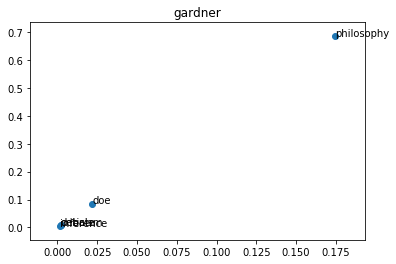

In [258]:
Z=LSA_fun('all_book_titles.txt',VD=5)

Number of errors parsing file: 0 number of lines in file: 2373


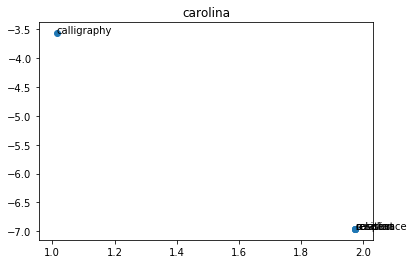

In [238]:
Z=LSA_fun(path='all_book_titles.txt',VD=5,model='TSNE')

Number of errors parsing file: 0 number of lines in file: 5862


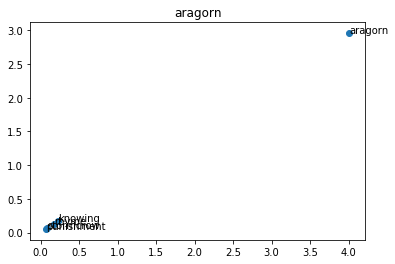

In [256]:
Z = LSA_fun(path='lotr_ttt.txt',VD=5)